# Maximum Likelihood Estimation (MLE)

### Success Criteria
Today I will be successful if I can ...

1. Describe the difference between likelihood and probability. 
2. Define Maximum Likelihood Estimation
3. Calculate the MLE for a poisson distribution and a normal distribution. 
4. Be patient with myself because this stuff ain't easy. 

In [36]:
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

np.random.seed(42)
secret_number = np.random.uniform(0,10)


# For presentation purposes with dark jupyter
plt.style.use('ggplot')

import matplotlib as mpl
COLOR = '#DF0969'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


In [15]:
def multiply(**kwargs):
    print(kwargs)
    value = 1
    for k, v in kwargs.items():
        value *= v
    return value
    

multiply(n1=10, n2=2, n3=6)

{'n1': 10, 'n2': 2, 'n3': 6}


120

In [26]:

def make_draws(dist, size, **params):
    print(params)
    # params has to be in the form of a dictionary for **params to work
    # stats.binom(**kwd) in the definition
    return dist(**params).rvs(size)

binom_rvs = make_draws(stats.binom, 5, n=100, p=0.1)
binom_rvs


{'n': 100, 'p': 0.1}


array([ 8,  6, 11,  9,  7])

## Probability v. Likelihood

### Probabability

- Know something about underlying reality or parameter distributions. 

When this is true, we can ask ourselves, "What is the chance of observing this particular data or sample given a specific model or population?" 

For example, If we know the mean of female heights are normally distributed with a mean of 63.7 and a standard deviation of 3 then **what is the chance of observing a woman with a height bewtween 63 and 65 inches?**


In [23]:
def plot_norm(ax, mean, std, **kwargs):
    dist = stats.norm(mean, std)
    x = np.linspace(mean - std*3, mean + std*3, 251)
    ax.plot(x, dist.pdf(x), **kwargs)
    return x, dist
   
def plot_dist_with_datapoint(ax, mean, std, data_val, **kwargs):
    plot_norm(ax, mean, std)
    ax.scatter(data_val, 0, color = 'Purple', s = 100, **kwargs)

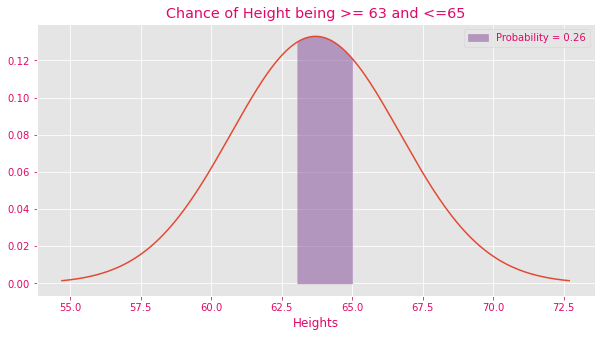

In [40]:
mean = 63.7
std = 3

fig,ax = plt.subplots(figsize = (10,5))

x, dist = plot_norm(ax, mean, std)

ax.fill_between(x, dist.pdf(x), where=((x>=63)&(x<=65)), color = '#824896', alpha = 0.5, \
                label = f'Probability = {round(dist.cdf(65)-dist.cdf(63),2)}')
ax.set_title('Chance of Height being >= 63 and <=65')
ax.set_xlabel('Heights')
ax.legend();

How we would say or write this is... 

$$P(63<=H<=65 \mid (\mu = 63.7 \space and \space \sigma = 3))  = 0.26$$

The probability that a female's height is between 63 and 65 inches given our mean is 63.7 and our standard deviation is 3 is 0.26. 


With probability we can continuously **change the first half of this sentence** depending on what we are interested in. 

Like:

$$P(H > 67 \mid (\mu = 63.7 \space and \space \sigma = 3))$$

What is the probability that a female's height is greater than 67 inches given our mean is 63.7 and our standard deviation is 3? 

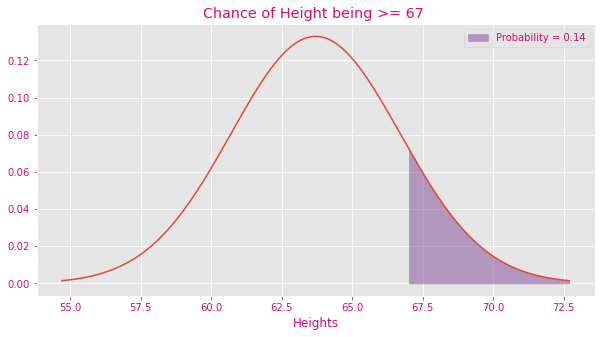

In [39]:
fig,ax = plt.subplots(figsize = (10,5))

x, dist = plot_norm(ax, mean, std)

ax.fill_between(x, dist.pdf(x), where=(x>=67), color = '#824896', alpha = 0.5, \
                label = f'Probability = {round(1 - dist.cdf(67),2)}')
ax.set_title('Chance of Height being >= 67 ')
ax.set_xlabel('Heights')
ax.legend();

### Likelihood

- Don't know much about underlying reality or parameter distributions. 
- We DO know our data


Likelihood is kinda like the reverse of probability. 

#### What is the chance or likelihood that a given reality or model is true given our observation data? 

$$L({Distribution \space Parameter} \mid {Data})$$



The normal distribution has probability density function:

$$ \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\big(\frac{x - \mu}{\sigma}\big)^2} $$

Evaluating this function gives us a *likelihood* not the probability. 

<!-- Considering that the exact evaluation of this function gives us a value other than zero tells us that it is not a probability  
 -->
 
 #### Example:

We poll a rondom Female who is 67 inches tall.
 

With Likelihood, it assumes you already have information about your heights available. 

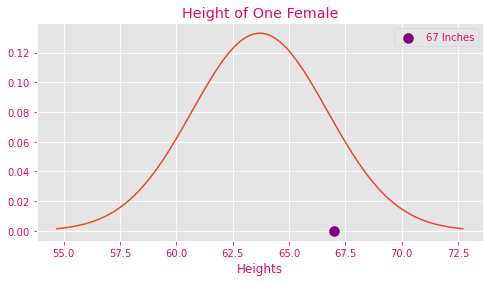

In [41]:
#for this visual, we have a distribution to start with... 

fig,ax = plt.subplots(figsize = (8,4))
plot_dist_with_datapoint(ax, mean, std, 67, label = '67 Inches')
ax.set_title('Height of One Female')
ax.set_xlabel('Heights')
ax.legend();

The likelihood of measuring a woman this tall is the point on the curve where the datapoint lies, this is the evaluation of our PDF function mentioned above. 

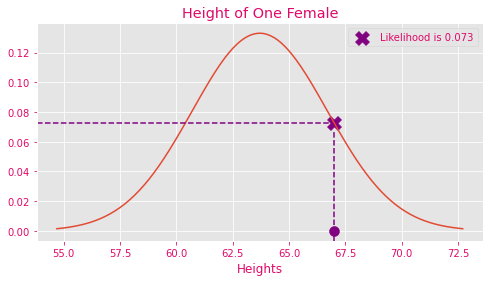

In [51]:
fig,ax = plt.subplots(figsize = (8,4))
plot_dist_with_datapoint(ax, mean, std, 67)
ax.axvline(67, ls = '--', c = 'purple', ymax = 0.5)
ax.axhline(dist.pdf(67), ls = '--', c = 'purple', xmax = 0.66)
ax.scatter(67, dist.pdf(67), marker = 'X', color = 'purple', s = 200, 
          label = f'Likelihood is {round(dist.pdf(67),3)}')
ax.set_title('Height of One Female')
ax.set_xlabel('Heights')
ax.legend();


###### Likelihood is said in this way

$$L((\mu = 63.7 \space and \space \sigma = 3) \mid H = 67) $$

The likelihood of having a meaen of 63.7 and standard deviation of 3 given that we have a 67 in tall female is 0.073. 

If we shift the distribution over, so that the mean was 67 grams, we see we have increased our likelihood from 0.073 to 0.133. 

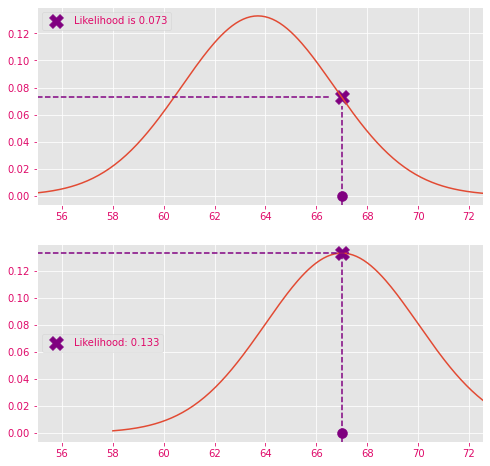

In [52]:
fig,axs = plt.subplots(2,1, figsize = (8,8))
ax = axs[0]
ax1 = axs[1]

plot_dist_with_datapoint(ax, mean, std, 67)
ax.set_xlim(55, 72.55)
ax.axvline(67, ls = '--', c = 'purple', ymax = 0.5)
ax.axhline(dist.pdf(67), ls = '--', c = 'purple', xmax = 0.66)
ax.scatter(67, dist.pdf(67), marker = 'X', color = 'purple', s = 200, 
          label = f'Likelihood is {round(dist.pdf(67),3)}')
ax.legend(loc = 'upper left')

plot_dist_with_datapoint(ax1, 67, std, 67)
ax1.set_xlim(55, 72.55)
ax1.axvline(67, ls = '--', c = 'purple', ymax = 0.95)
new_dist = stats.norm(67, 3)
ax1.axhline(new_dist.pdf(67), ls = '--', c = 'purple', xmax = 0.7)
ax1.scatter(67, new_dist.pdf(67), marker = 'X', color = 'purple', s = 200, 
          label = f'Likelihood: {round(new_dist.pdf(67),3)}')
ax1.legend(loc ='center left');

Now we typically have more than one data point, that is where the MLE will come into play, for now, make sure you understand the differences between Likelihood and Probability.  

#### In Summary

Probabilities are areas under a fixed distribution

$$P(data \mid distribution) $$


Likelihoods are the y axis values for fixed data points with distributions that can be moved...

$$L(distribution \mid data) $$



# Maximum Likelihood Estimation

The **maximum likelihood method** is the gold standard method for fitting statistical models to data.

Our goal is to make the following philosophy of model fitting precise

> The model should be the random variable that is *most likely* to generate the data.

### Poisson Distribution MLE Example

Lets first review the parameters involved with a poisson distribution

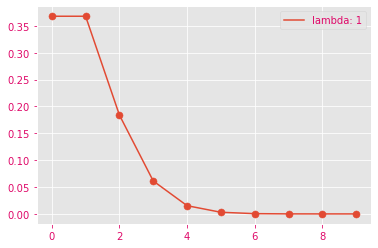

In [57]:
lambdas = np.arange(1,6)
fig, ax = plt.subplots()
x = np.arange(0, 10)
_ = ax.scatter(x, stats.poisson(mu=1).pmf(x),
           s=50, zorder=2)
_ = ax.plot(x, stats.poisson(mu=1).pmf(x),
           zorder=2, label=f"lambda: {1}") 

ax.legend();

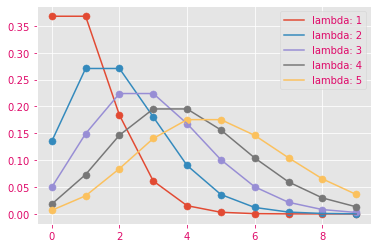

In [59]:
lambdas = np.arange(1,6)
fig, ax = plt.subplots()
x = np.arange(0, 10)
_ = [ax.scatter(x, stats.poisson(mu=l).pmf(x),
           s=50, zorder=2) for l in lambdas]
_ = [ax.plot(x, stats.poisson(mu=l).pmf(x),
           zorder=2, label=f"lambda: {l}") for l in lambdas]

ax.legend();

#### Examples might be the best way to learn MLE... Let's dive in. 

I am interested in the number of people every week who view my LinkedIn profile. (this should follow a poisson distribution) 

I go out and get some data, we assume it is iid and random.  

$$ x_1 ... x_{50} $$ 


Lambda $\lambda$ represents the mean that we would be looking for in this case and I know that each $X_i \sim Pois(\lambda)$


The Poisson distribution has pmf: 
$$\large{\frac {\lambda ^{x}e^{-\lambda }}{x!}}$$


Just like probabilities, we can multiply likelihoods together to get the joint likelihood if we assume all of the data points are independent. So, since we have many data points $x_0, x_1, x_2, \dots, x_{50}$, then the joint likelihood is:

$$ \large L(\lambda \mid x_1 ... x_{50}) = \prod_{i=1}^{50} {\frac{\lambda ^{x_i}e^{-\lambda }}{x_i!}} $$

### Let's pause here and make sure we are comfortable so far

The likelihood that our data came from a Poisson Distribution with a lambda of 7: 
2.24265781399405e-66


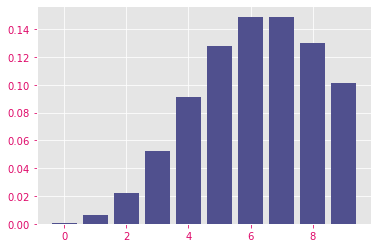

In [63]:
# Let us take a look at those data points over a specific lambda

#Generate fake data using our secret lambda
data = stats.poisson(mu=secret_number).rvs(50)

# create a list of likelihood of each of those outcomes, right now we are guessing a lambda
likelihoods = stats.poisson(mu = 7).pmf(data)

fig, ax = plt.subplots()
x = np.arange(0,max(data))
ax.bar(x, stats.poisson(mu=7).pmf(x), color ='#50508E')

# print out product of the likelihoods (joint probability assuming independence)
print(f'The likelihood that our data came from a Poisson Distribution with a lambda of 7: \n{np.prod(likelihoods)}')

In [68]:
lambdas = np.linspace(0.1, 10, 10)

likelihoods = [stats.poisson(mu = lam).pmf(data) for lam in lambdas]
np.prod(likelihoods[0])
data

array([ 2,  5,  4,  3,  4,  6,  5,  3,  5,  8,  3,  5,  6, 10,  5,  4,  5,
        1,  3,  0,  5,  6,  6,  2,  1,  1,  4,  2,  1,  2,  2,  3,  5,  4,
        4,  2,  4,  3,  1,  2,  5,  3,  2,  6,  1,  2,  3,  4,  5,  5])

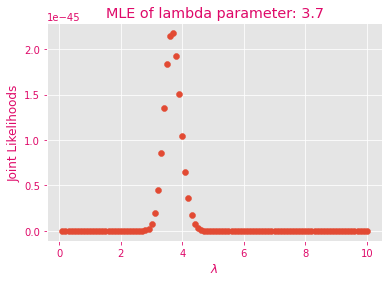

In [67]:
# Take a look at joint likelihoods over varying lambdas... It looks like this product thing works.
lambdas = np.linspace(0.1, 10, 100)

likelihoods = [stats.poisson(mu = lam).pmf(data) for lam in lambdas]
join_likes = [np.prod(like) for like in likelihoods]
fig, ax = plt.subplots()
ax.scatter(lambdas, join_likes)
ax.set_ylabel('Joint Likelihoods')
ax.set_xlabel(r'$\lambda$')
ax.set_title('MLE of lambda parameter: {}'.format(round(lambdas[np.argmax(join_likes)],2)));

Easy right? We see where our Joint likelihood is the highest and we call it a day?

Not quite...

So in theorey... we could stop here and move on, except, when we are searching for maximum likelihood, it is rarely this simple and in various areas we are searching for multiple parameters. 

So mathematically, we can actually consider taking the derivative of our joint probability function and set that to equal zero. This will give us our maximum likelihood. 

Why not take the derivative of a large product over many different parameters?

*note: we wont worry about the derivatives today but I want you to see motivation for log likelihood*

#### Log Likelihood

It turns out that it's typically easier to work with likelihoods if we use the log likelihood instead. Our goal is to **maximize** the likelihood. We want to find the easiest thing possible to maximize, so can we instead maximize the log likelihood?

$$\large \ln ( \prod_{i=1}^{50} {\frac{\lambda ^{x_i}e^{-\lambda }}{x_i!}} ) $$

What this does is change our multiplication to addition because taking the log of a product gives us the sum of the log of the indiviudals. 

We are using a log rule. $\ln(m * n) = \ln m + \ln n$.

$\ln x = y$ is equivalent to $ x = e^y $

So now we get this...

$$\large\sum_{i=1}^{50} \ln\left({\frac{\lambda ^{x_i}e^{-\lambda }}{x_i!}}\right)$$


In [69]:
#CODE
# Still have a distribution 
poisson = stats.poisson(4)

# find the likelihoods of all data points using the pmf (numpy ndarray)
likelihoods = [poisson.pmf(datum) for datum in data]

# we are finding the logs of the likelihoods
log_likelihoods = np.log(likelihoods)

# summing up the log likelihoods
log_likelihood_sum = np.sum(log_likelihoods)

print('The log likelihood that  our data came from a Poisson Distribution with a lambda of 4:')
print(log_likelihood_sum)

The log likelihood that  our data came from a Poisson Distribution with a lambda of 4:
-103.57264364318132


In [71]:
np.log(np.arange(1,6))

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

In [117]:
data

array([ 2,  5,  4,  3,  4,  6,  5,  3,  5,  8,  3,  5,  6, 10,  5,  4,  5,
        1,  3,  0,  5,  6,  6,  2,  1,  1,  4,  2,  1,  2,  2,  3,  5,  4,
        4,  2,  4,  3,  1,  2,  5,  3,  2,  6,  1,  2,  3,  4,  5,  5])

In [72]:
#Let's functionize this 

def log_likelihood_poisson(lam, data):
    '''
    Calculates the log likelihood of the data given that the data is distributed as Poisson(lambda = scale)
    
    Parameters:
    scale: a scale parameter corresponding to 'lambda' in the pdf definition.
    data: the observed data
    
    Returns:
    float: The log likelihood of the data given the distribution.
    '''
    # instantiate poisson as a poisson distriution with shape supplied in the function call.
    poisson = stats.poisson(lam)
    
    # find the likelihoods of all data points using the pmf (numpy ndarray)
    likelihoods = [poisson.pmf(datum) for datum in data] #poisson.pmf(data) will also work but this comprehension is more visual code
    
    # we are finding the logs of the likelihoods
    log_likelihoods = np.log(likelihoods)
    
    # summing up the log likelihoods
    log_likelihood_sum = np.sum(log_likelihoods)
    return log_likelihood_sum

In [79]:
search_space = np.linspace(0.1,20, 20)

poisson_log_likelihoods = [log_likelihood_poisson(lam, data) for lam in search_space]
print(np.round(poisson_log_likelihoods))

max_idx = np.argmax(poisson_log_likelihoods)
print(max_idx)

print(search_space[max_idx])

[-584. -189. -123. -104. -105. -118. -137. -162. -190. -221. -254. -289.
 -326. -364. -403. -443. -483. -525. -567. -609.]
3
3.2421052631578946


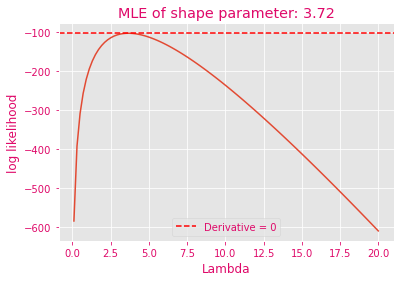

In [78]:
# Visualize the monotonic increase

# Create an empty array to hold the log likelihoods
poisson_log_likelihood = []

# create a numpy ndarray from 0.1 to 10 with 100 points along the line.
search_space = np.linspace(0.1, 20, 100)

# loop through our search space and append the sum of log likelihoods of the data given model 
# Poisson(lambda) to the log_likelihood array 
for lam in search_space:
    poisson_log_likelihood.append(log_likelihood_poisson(lam, data))

# get the index of the maximum log_likelihood value
max_idx = np.argmax(poisson_log_likelihood)    

# create a variable equal to the search space corresponding to the maximum log likelihood value.
mle = search_space[max_idx]
highest_log_pois = poisson_log_likelihood[max_idx]

# create the plot
fig, ax = plt.subplots(1, 1)
ax.plot(search_space, poisson_log_likelihood)
ax.axhline(highest_log_pois, ls = '--',c='r', label = 'Derivative = 0')
ax.set_title('MLE of shape parameter: {}'.format(round(search_space[max_idx],2)))
ax.set_xlabel("Lambda")
ax.set_ylabel("log likelihood")
ax.legend();

In [81]:


#had data
#guess the best mean 
round(search_space[max_idx],2)

3.24



In practice, we use an algorithm like **gradient descent** to find a good approximation to the maximal parameters, this process is called optimization.

For now, searching is good engough across various parameters and simply finding the max index is good engough. You do have the ability to calulate a parameter by setting your derivative to zero and solving but we don't need to do this now

### So lets review steps we did above.

1. Id a model that might fit... (normal, poisson, binomial...)
2. Write down the density/ or mass functions of all the random variables in the model. (pdf or pmf)
3. Write code to compute the log likelihood function of the model given the data
    - pdf of each data point
    - log of each pdf
    - sum the logs


4. Create a large engough searchspace to find a good estimate for parameter. 


## Normal Distribution Example:

The normal Distribution has two parameters we need to consider... For now, we will just see about estimating one and assuming the second. 

I have been considering this female height example for a while and I am fairly certain that the population mean is 63.7. What I am not sure of, and why I have been guessing is the standard deviation. 

Let us use MLE to find our Female Heights Estimated Standard Deviation


In [82]:
np.random.seed(42)
#another secret value to help us generate data. 
secret_std = np.random.uniform(0,5)

height_data = stats.norm(63.7, secret_std).rvs(100)

### Step 1:  Id a model that might fit... (normal, poisson, binomial...)

Normal and Mean of 63.7

### Step 2. Write down the density/ or mass functions of all the random variables in the model. (pdf or pmf)

Remember that our likelihoods can be calculated as the evaluation of any y value on our pdf or pmf. 

The normal distribution has probability density function:

$$ \large\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\big(\frac{x - \mu}{\sigma}\big)^2} $$

We know the product of the likelihoods can convert to the sum of the logs of the likelihoods so we dont need to do joint probability any more instead move into the log likelihood

$$\large\sum_{i=0}^{100} \ln\left(\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\big(\frac{x_i - \mu}{\sigma}\big)^2}\right)$$





### Step3. Write code to compute the log likelihood function of the model given the data
    - pdf of each data point
    - log of each pdf
    - sum the logs

In [83]:
def log_likelihood_normal(mean, std, data):
    normal = stats.norm(loc=mean, scale=std)
    likelihoods = normal.pdf(data)
    return np.round(np.sum(np.log(likelihoods)))

In [84]:
def log_likelihood_normal(mean, std, data):
    '''
    Calculates the log likelihood of the data given that the data is distributed as Normal(mean = 63.7, sigma = std)
    
    Parameters:
    std: 'standard deviation' parameter corresponding to 'scale' in the pdf definition.
    data: the observed data
    
    Returns:
    float: The log likelihood of the data given the distribution.
    '''
    normal = stats.norm(mean, std)
    #pdf of each datapoint 
    likelihoods = normal.pdf(data) # just use pdf for likelihood! (list comprehension is unnecessary but can be clearer visually)
    #log of each pdf... You can use another comprehenison here if you like but again, it is unnecssary 
    logs = np.log(likelihoods)
    #return the sum of those logs
    return np.sum(logs)

### Step 4. Create a large engough searchspace to find a good estimate for parameter. 

Let's find that max log likelihood

In [87]:
def log_like_plot(ax, search_space, log_likelihoods, max_log, parameter, mle):
    ax.plot(search_space, log_likelihoods)
    ax.axhline(max_log, ls='--', c='#DF0969', label = 'Derivative = 0')
    ax.set_title(f'MLE of {parameter}: {round(mle,2)}')
    ax.set_xlabel(f'{parameter}')
    ax.set_ylable('log likelihood')
    ax.legend();

In [88]:
def log_like_plot(ax, x, log_likelihood, max_log, mle, parameter = 'standard deviation'):
    # create the plot
    ax.plot(x, log_likelihood)
    ax.axhline(max_log, ls = '--',c='r', label = 'Derivative = 0')
    ax.set_title(f'MLE of {parameter}: {round(mle,2)}')
    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("log likelihood")
    ax.legend();

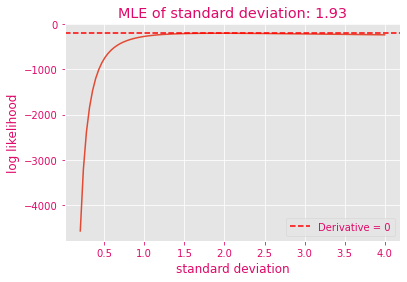

In [89]:
# Create an empty array to hold the log likelihoods


# create a numpy ndarray from 0.1 to 10 with 100 points along the line.
search_space = np.linspace(0.2, 4, 100)

# loop through our search space and append the sum of log likelihoods of the data given model 
# Poisson(lambda) to the log_likelihood array 
log_likelihood = [log_likelihood_normal(63.7, std, height_data) for std in search_space]


# get the index of the maximum log_likelihood value
max_idx = np.argmax(log_likelihood)    
# create a variable equal to the search space corresponding to the maximum log likelihood value.
mle = search_space[max_idx]

#plot it for fun
fig, ax = plt.subplots(1, 1)

log_like_plot(ax, search_space, log_likelihood, log_likelihood[max_idx], mle)

## Now you try... 

In [ ]:
# Take a few minutes to write this    
def log_likelihood_binomial(n, p, data):
    '''
    Calculates the log likelihood of the data given that the data is distributed as Binomial(n, p)
    
    Parameters:
    n: the number of bernoulli trials for the binomial distribution
    p: the probability of success for each bernoulli trial
    
    Returns:
    float: The log likelihood of the data given the distribution.
    '''
    binomial = stats.binom(n,p)
    
    likelihoods = binomial.pmf(data)
    
    sum_logs = np.sum(np.log(likelihoods))
    
    return sum_logs

<!--     binomial = stats.binom(n, p)
    
    likelihoods = binomial.pmf(data)
    
    log_likelihoods = np.log(likelihoods)
    
    log_likelihood_sum = np.sum(log_likelihoods)

    return(log_likelihood_sum) -->

## What if we want to know two parameters? Like n and p?

In [104]:
log_likelihood = np.zeros([2,2])
log_likelihood

for m_idx, _ in enumerate(log_likelihood):
    for n_idx, _ in enumerate(log_likelihood):
        log_likelihood[m_idx, n_idx] = (m_idx*3) + n_idx

print(log_likelihood)

print(np.argmax(log_likelihood))

np.unravel_index(np.argmax(log_likelihood), log_likelihood.shape)

[[0. 1.]
 [3. 4.]]
3


(1, 1)

In [106]:
# Create an empty numpy array to hold the log likelihoods.
# We want it to be 100x100 because we'll have 100 candidate values for each parameter.
log_likelihood = np.zeros([100, 100])

# create a numpy ndarray from 1 to 100 as candidate values for n
#total number of trials 
# we need to set min_value to the max of our data, because you can't get a result greater than 'n'
# from a binomial distribution.
min_value = np.max(data)
n_search_space = np.arange(min_value, min_value + 100)

In [107]:
def log_likelihood_binomial(n, p, data):
    binomial = stats.binom(n=n, p=p)
    likelihood = binomial.pmf(data)
    log = np.log(likelihood)
    return np.sum(log)

In [108]:
# create a numpy array from 0.01 to 0.99, 
# Avoiding 0 and 1 because you couldn't get any values other than 0 with p=0 or n if p=100.
p_search_space = np.linspace(0.01, 0.99, 100)

# loop through our search space and append the sum of log likelihoods of the data given model 
# binomial(n, p) to the log_likelihood array 
# enumerate is a useful function for for loops that allows you to capture both the index and the value.
for n_idx, n in enumerate(n_search_space):
    for p_idx, p in enumerate(p_search_space):
        log_likelihood[n_idx, p_idx] = log_likelihood_binomial(n=n, p=p, data=data)

# get the index of the maximum value        
unraveled_idx_of_max = np.argmax(log_likelihood)

In [109]:

# convert the single number index into a row and column useful for getting the original parameters. 
idx_n, idx_p = np.unravel_index(unraveled_idx_of_max, log_likelihood.shape)

print(f"Maximum log likelihood: {np.max(log_likelihood)}")
print(f"n: {n_search_space[idx_n]}, p: {p_search_space[idx_p]}")

Maximum log likelihood: -102.89739665533043
n: 92, p: 0.039696969696969696


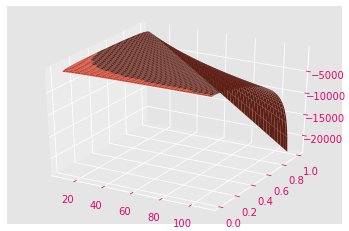

In [110]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid


X, Y = meshgrid(n_search_space, p_search_space)
Z = np.array([
        [log_likelihood_binomial(n,p, data)] 
         for n,p in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

### Law of Small Numbers

The poisson distribution is a good approximation to the binomial distribution, where $\lambda = np$. It shouldn't be surprising that the max log likelihoods are similar across the two distributions.


In [113]:
print(f'Poisson Distribution log_like:  {highest_log_pois} \nBinomial Distribution log_like: {np.max(log_likelihood)}')

Poisson Distribution log_like:  -102.85163602139164 
Binomial Distribution log_like: -102.89739665533043


### Why is this negative number useful?

Every data point has a likelihood given some model. That likelihood is between 0 and 1. The log of a number between 0 and 1 is always negative. Multiple independent events means that the joint likelihood is the product of the likelihoods, and the log of the joint likelihood is the sum of log likelihoods. We're taking the log because log is a monotonically increasing function, so maximizing it is the same as maximizing the original function.  Sum of negative numbers gets more and more negative. 

But if you have the same number of data points, then the relative log likelihood can be compared for goodness of fit.

Best fit is the largest number. (So smallest absolute value). Number closest to 0.  

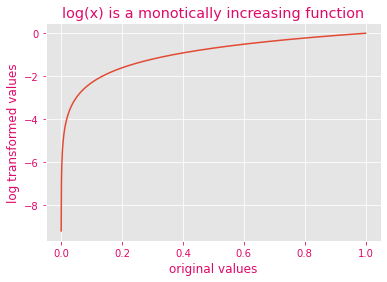

In [114]:
# What does monotonically increasing mean?
# If a function f is monotonically increasing, maximizing f(x) is equivalent to maximizing(x)

original = np.linspace(0.0001, 1, 1000)
logged = np.log(original)

fig,ax = plt.subplots(1)

ax.plot(original, logged)
ax.set_xlabel('original values')
ax.set_ylabel('log transformed values')
ax.set_title('log(x) is a monotically increasing function');

In [115]:
# Taking a product of many small numbers computes to zero. 

np.prod([0.01]*1000)

0.0

In [116]:
# To be able to do operations on many small numbers, you should instead sum the logs. 
# Using the log is also useful when trying to take a derivative for the purposes of 
# using the derivative for optimization (max/min).

np.sum([np.log(0.01)]*1000)

-4605.17018598809

In [ ]:
lam = 2
stats.expon.rvs(0, 0.5, 1)